<a href="https://colab.research.google.com/github/deepd1534/100-days-of-machine-learning/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# HOTEL BOOKING ANALYSIS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#READING THE DATASET
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Datasets/Hotel Bookings.csv')

In [ ]:
#CHECKING 10 RANDOM ROWS
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
90251,City Hotel,0,0,2016,June,23,3,0,1,1,...,No Deposit,NaN,NaN,0,Transient,131.0,0,0,Check-Out,2016-06-04
75465,City Hotel,1,334,2015,September,38,16,0,2,2,...,Non Refund,1.0,NaN,0,Transient-Party,62.0,0,0,Canceled,2015-07-02
704,Resort Hotel,1,299,2015,July,30,25,2,5,2,...,No Deposit,240.0,NaN,0,Transient,149.0,0,1,Canceled,2015-03-25
94458,City Hotel,0,1,2016,August,32,4,0,1,2,...,No Deposit,9.0,NaN,0,Transient,151.0,0,1,Check-Out,2016-08-05
8990,Resort Hotel,1,138,2016,October,43,22,2,2,2,...,No Deposit,240.0,NaN,0,Transient,68.0,0,0,Canceled,2016-06-20
102638,City Hotel,0,59,2016,December,49,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,93.6,0,2,Check-Out,2016-12-04
19026,Resort Hotel,0,0,2015,December,50,6,1,0,2,...,No Deposit,NaN,NaN,0,Transient,68.0,0,0,Check-Out,2015-12-07
85169,City Hotel,0,11,2016,March,11,7,1,3,2,...,No Deposit,28.0,NaN,0,Transient,70.0,0,0,Check-Out,2016-03-11
45922,City Hotel,0,84,2015,November,48,27,1,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,64.0,0,0,Check-Out,2015-11-30
34569,Resort Hotel,0,24,2017,March,13,29,2,5,2,...,No Deposit,250.0,NaN,0,Transient,12.0,0,1,Check-Out,2017-04-05


In [ ]:
#CHECKING THE SHAPE OF THE DATASET
df.shape

(119390, 32)

In [ ]:
#PRINTING DF.INFO

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data cleaning


In [ ]:
# checking for the duplicate rows
df.duplicated().value_counts()  

False    87396
True     31994
dtype: int64

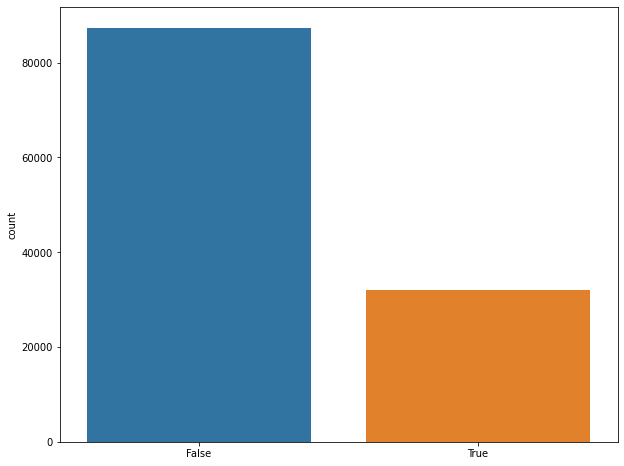

In [ ]:

# Visulizing through Count pot
plt.figure(figsize=(10,8))
sns.countplot(x=df.duplicated())

In [ ]:
#dropping the duplicate rows
df= df.drop_duplicates()

In [ ]:
# data set reduced
df.shape

(87396, 32)

So, we have around 87,396 records


In [ ]:
#checking for Null Values
df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


Text(0.5, 1.0, 'Places of missing values in column')

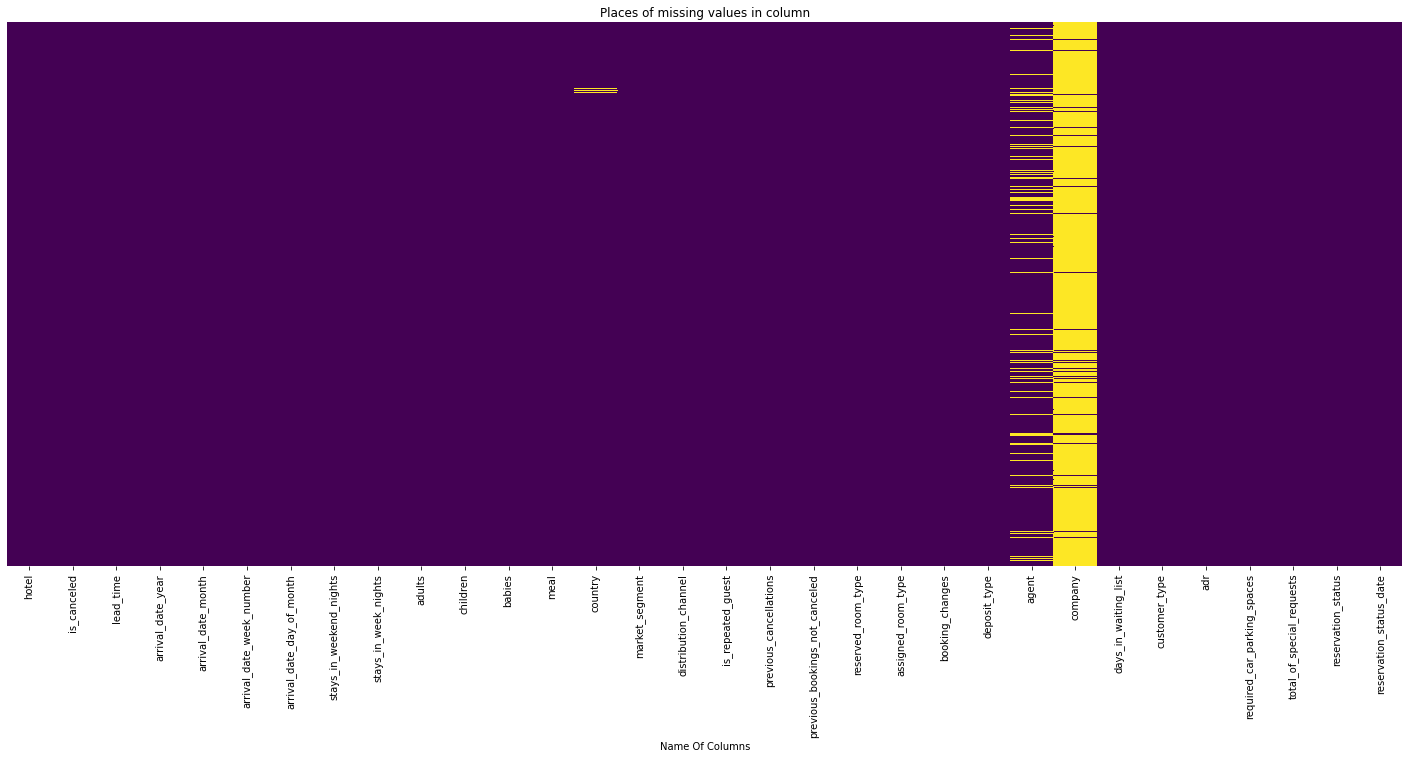

In [ ]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

In [ ]:
# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
  df[col].fillna(0,inplace=True)


# Replacing NA values with 'others'
df['country'].fillna('others',inplace=True)

In [ ]:
#checking for Null Values
df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})  

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


In [ ]:
# droppping all 166 those rows in which addtion of of adlults ,children and babies is 0, which means that  no bookings were made.

df.drop(df[df['adults']+df['babies']+df['children']==0].index,inplace=True)

In [ ]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(df.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df.describe()))
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(df[col].unique())}')

Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']


In [ ]:
# lets add some new columns
df['stays']= df['stays_in_weekend_nights']+df['stays_in_week_nights']
df['total_people'] = df['adults'] + df['babies'] + df['children']

In [ ]:
#PRINTING STATISTICS OF NUMERICAL VALUES
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,stays,total_people
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,...,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,...,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934,3.628534,2.029107
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,...,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051,2.742948,0.790141
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000,3.000000,2.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000,5.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,69.000000,55.000000


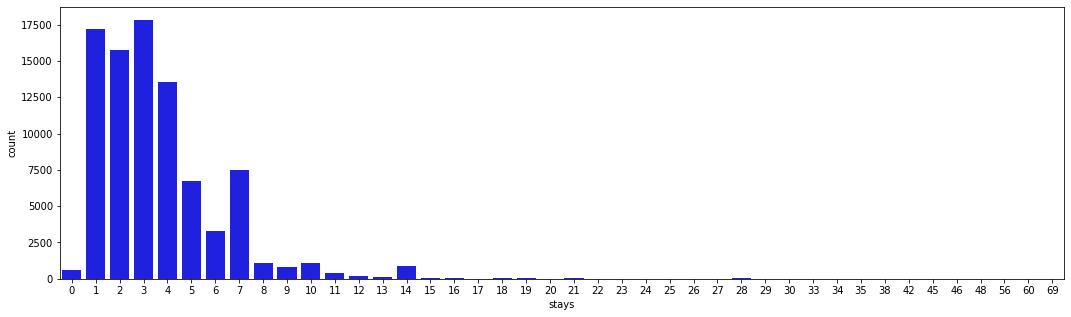

In [ ]:
#STAYS VS COUNT 
df['stays']= df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize=(18,5))
sns.countplot(x=df['stays'], color='b')
plt.show()

**Conclusion :**

Most number of people stay for 2-3 days in the hotels

# UNIVARIATE ANALYSIS

In [ ]:
#DIFFERENT COUNTRIES IN THE DATASET
df['country'].value_counts()

PRT    27355
GBR    10424
FRA     8823
ESP     7244
DEU     5385
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 178, dtype: int64

- So we have data from 12 different countries.

Text(0, 0.5, 'Count')

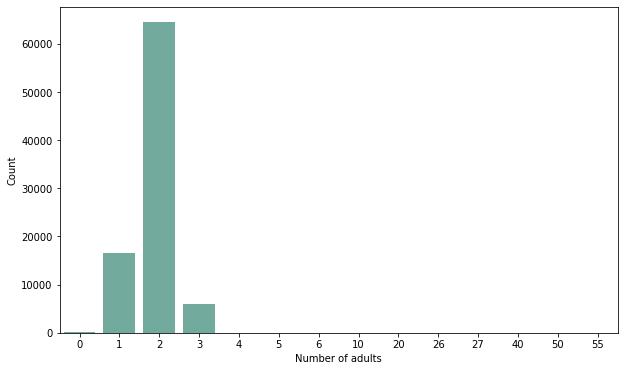

In [ ]:
#NUMBER OF ADULTS VS COUNT
plt.figure(figsize=(10, 6))

# plot a bar chart
sns.barplot(
    y='adults',
    x='index', 
    data=df['adults'].value_counts().reset_index(), 
    ci=None, 
    color='#69b3a2');

plt.xlabel("Number of adults")
plt.ylabel("Count")

**Conclusion:**

From the above visualization, we can deduce that majority of hotel bookers go in pairs.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


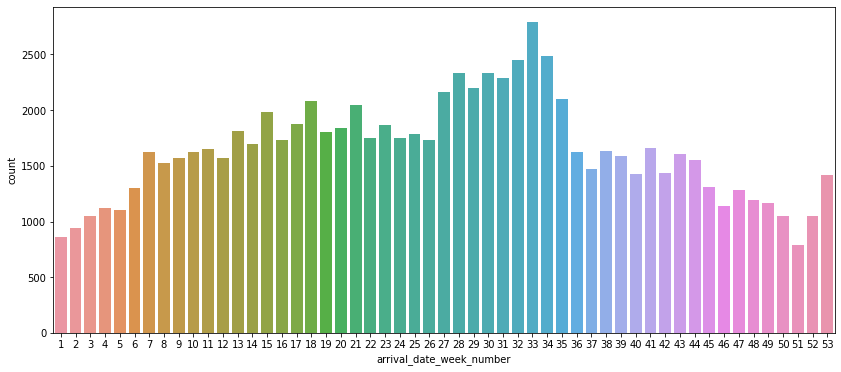

In [ ]:
#ARRIVAL DATE WEEK NUMBER VS COUNT
plt.figure(figsize=(14, 6))
sns.countplot(df['arrival_date_week_number'])

**Conclusion:**

The weeks 29-34 is the peak time for hotel bookings.

## In which months are the Hotel Bookings more?

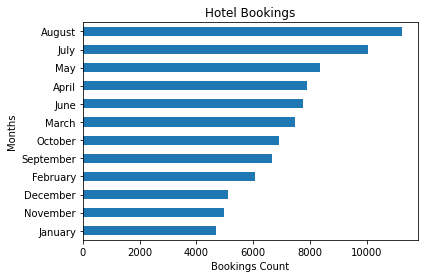

In [ ]:
# MONTHS VS BOOKINGS
df['arrival_date_month'].value_counts().sort_values().plot(kind = 'barh')

plt.title("Hotel Bookings")
plt.xlabel("Bookings Count")
plt.ylabel("Months")
# Show graph
plt.show()

**Conclusion:**

So we have most bookings in the months of August, July and May

In [ ]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of bookings')

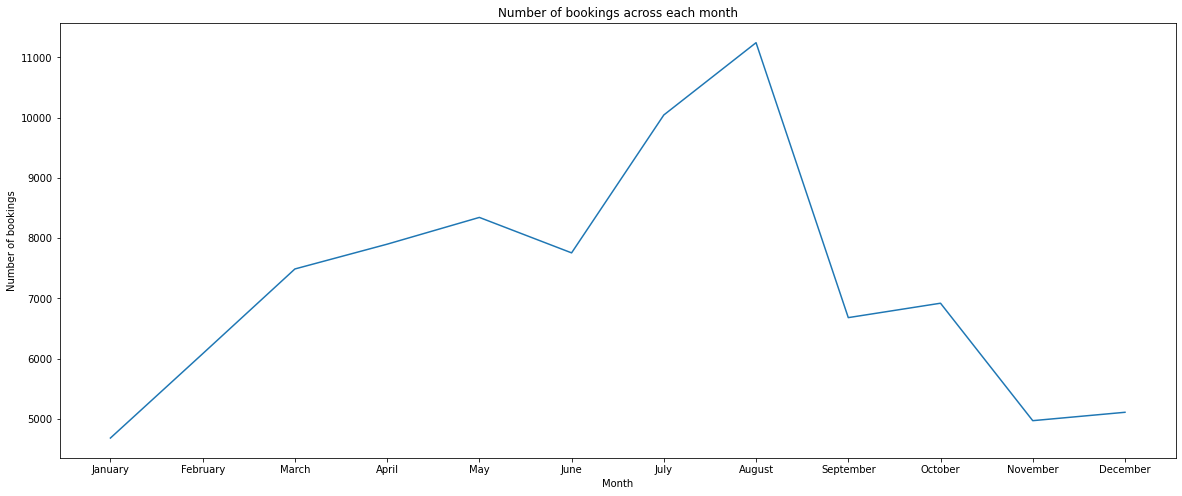

In [ ]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

### Bookings in Resort Hotels and City Hotels

Text(0.5, 1.0, 'Most Preffered  Hotel')

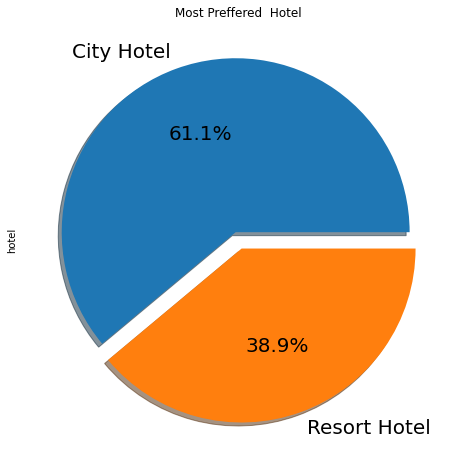

In [ ]:
# Visualizsing the by pie chart.
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Most Preffered  Hotel')

**Conclusion:**

Deducing from the above plot, people prefer City Hotels to Resort Hotels (Price maybe a factor, We'll try to find relationship between bookings in Resorts and city hotels)

## HOTEL BOOKINGS MADE BY AGENTS

In [ ]:

# return highest bookings made by agents
highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

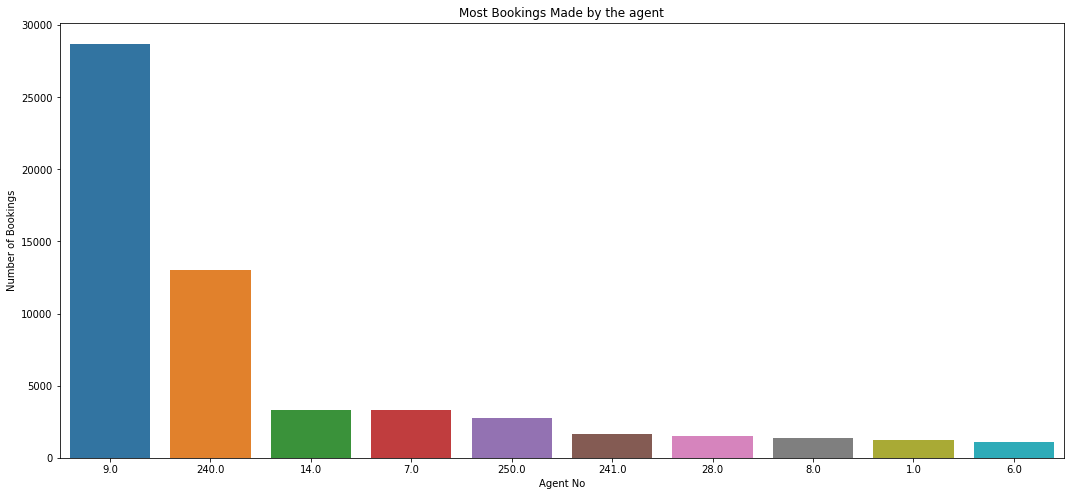

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")

## How much percentage of people cancel the bookings?

Text(0.5, 1.0, 'How much percentage of people cancel the bookings?')

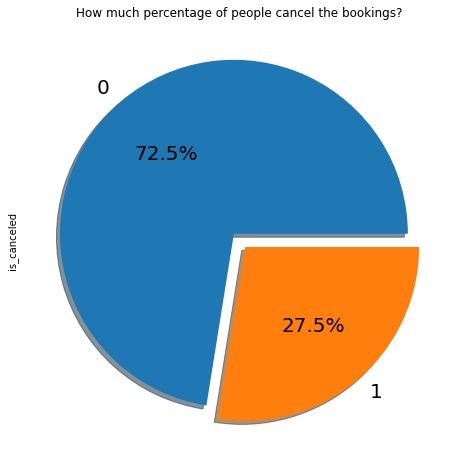

In [ ]:
df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("How much percentage of people cancel the bookings?")

### How many transactions have repeated guests?

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

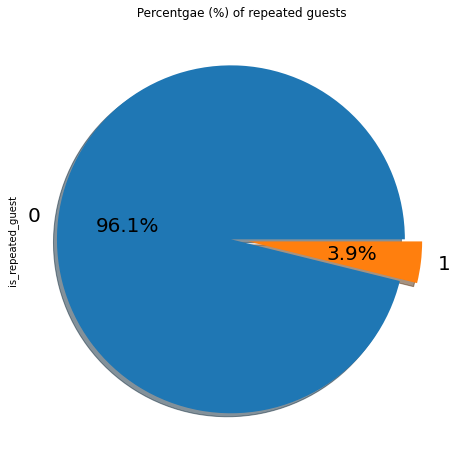

In [ ]:
#NUMBER OF REPEATED GUESTS
df['is_repeated_guest'].value_counts()
df['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")

## NUMBER OF GUESTS FROM DIFFERENT COUNTRIES

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

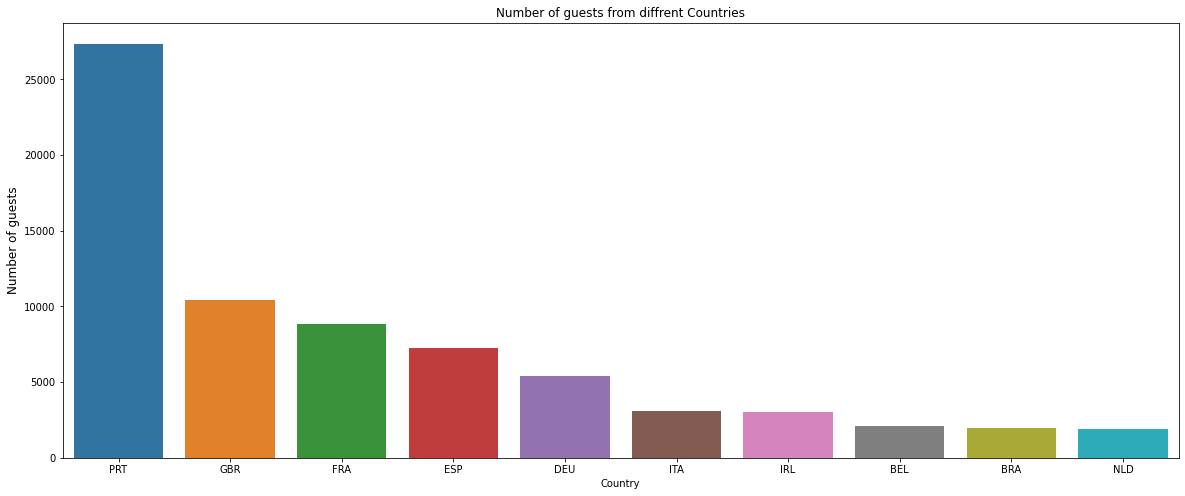

In [ ]:
# Counting the guests from various countries.
country_df=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
# country_df1=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")


### Boxplot of lead time

In [ ]:
df['lead_time'].mean()

79.97101914478964

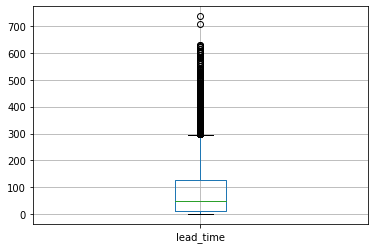

In [ ]:
#BOXPLOT OF LEAD_TIME
df.boxplot(column=['lead_time'])

We see that the average lead time is 104 days. The median lead time is above 50 days. There are many outliers as well.

### Types of meals

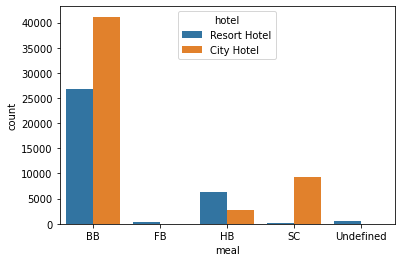

In [ ]:
#DIFFERENT TYPES OF MEALS IN HOTELS
sns.countplot(x = df['meal'], hue = df['hotel'])

What does RO, BB, HB, FB, AI on my hotel voucher?
These indicate the board basis booked:

- RO: Room only

- BB: Bed & Breakfast

- HB: Half Board (Breakfast and Dinner normally)

- FB: Full Board (Breakfast, Lunch and Dinner)

- AI: All Inclusive (all services of full board plus any others specified in each case)

So BB is mostly preferred followed by HB, FB is rarely preferred.

### Room types

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


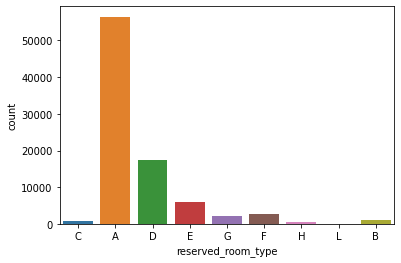

In [ ]:
#ROOM TYPES
sns.countplot(df['reserved_room_type'])


**Conclusion:**

Room type A is mostly preferred !

### Histogram of Average Daily Rate

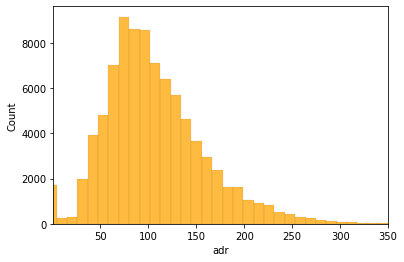

In [ ]:

#AVERAGE DAILY RATE (HISTOGRAM)
ax = sns.histplot(data = df, x='adr',bins=500,color='orange',edgecolor = 'k')  
ax.set_xlim(1,350)

plt.show()

**Conclusion :** 

So, on an average the average daily rate of hotels lie in the range 60-100

### Market Segments

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


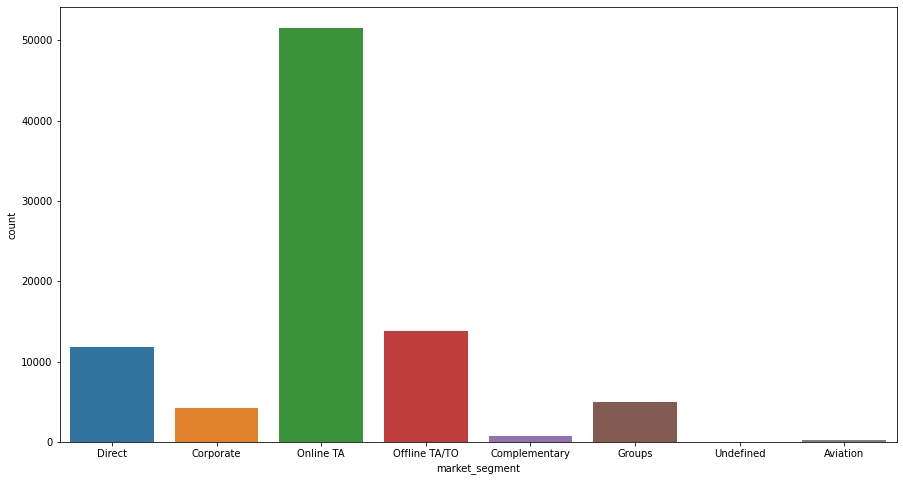

In [ ]:
#MAJOR MARKET SEGMENTS
plt.figure(figsize=(15, 8))
sns.countplot(df['market_segment'])

**Conclusion:**

Mostly, Online TA/TP segments followed by Groups, Direct and corporate segments book hotels the most.

### Types of customers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


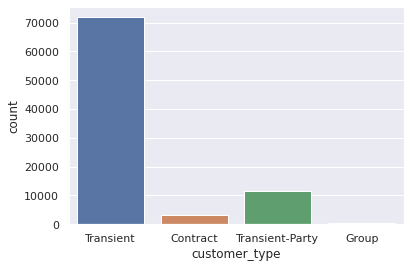

In [ ]:
#DIFFERENT TYPES OF CUSTOMERS
sns.set_theme(style="darkgrid")
sns.countplot(df['customer_type'])

# BIVARIATE & MULTIVARIATE ANALYSIS

## CORRELATION HEATMAP

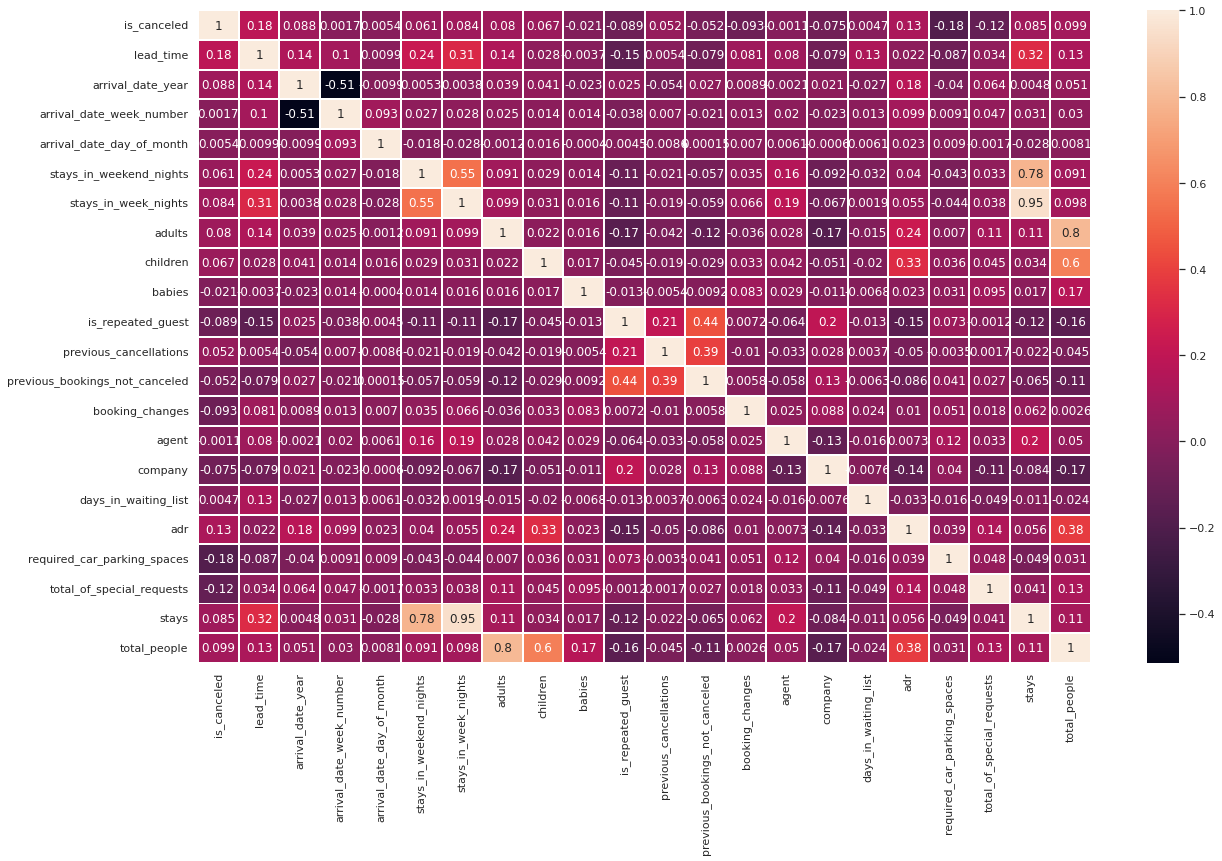

In [ ]:
#CORRELATION BETWEEN DIFFERENT COLUMNS
plt.figure(figsize=(20, 12))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,linecolor='white',linewidths=1)
plt.show()

### Boxplot of reserved room types

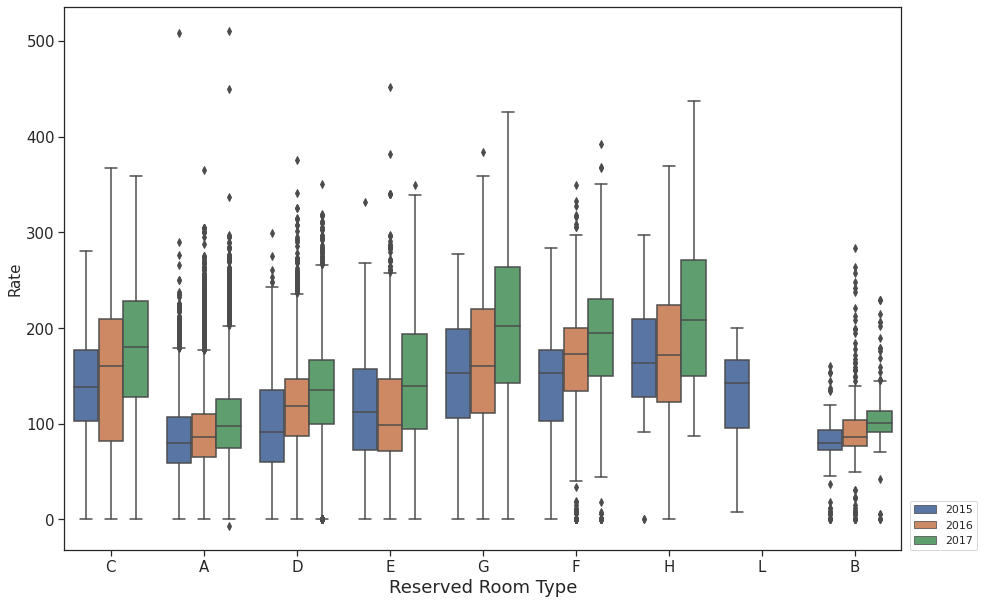

In [ ]:
#BOXPLOTS OF DAILY RATES OVER THE YEARS OF DIFFERENT ROOM TYPES
sns.set_style('ticks')
plt.figure(figsize=(15,10))
sns.boxplot(data = df[df['adr']<1000], x = 'reserved_room_type', y = 'adr', hue ='arrival_date_year', width = 0.8)
plt.xlabel("Reserved Room Type", fontsize = 18)
plt.xticks(fontsize=15)
plt.ylabel("Rate", fontsize = 15)
plt.yticks(fontsize=15)
plt.legend(loc=(1.01, 0))

### Average Daily Rate Of Different Hotels Over The Years

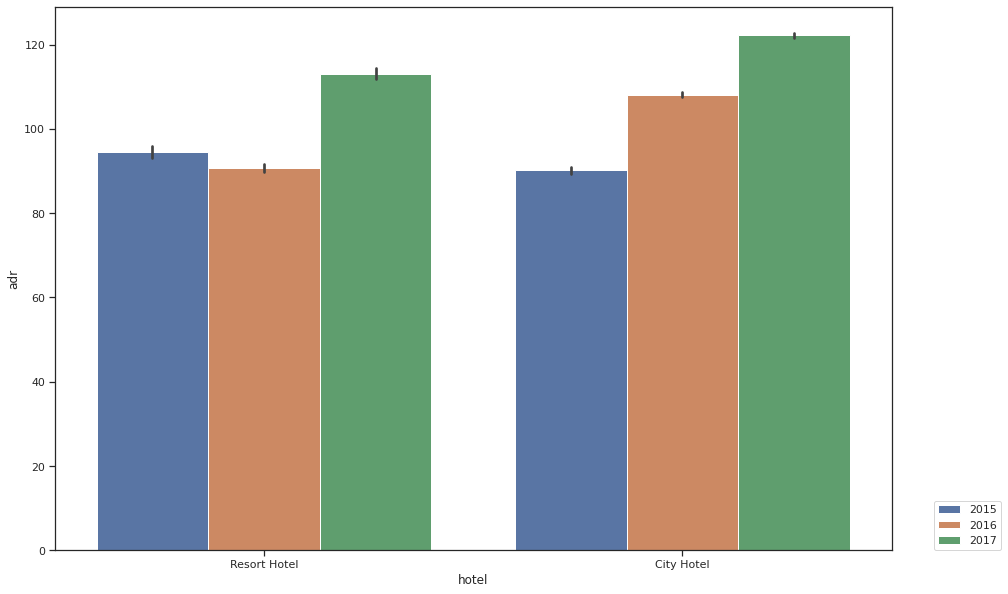

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = df, x = 'hotel', y = 'adr', hue ='arrival_date_year')
plt.legend(loc=(1.05, 0))

**Conclusion :** 

From the above boxplot and histogram, we can say that the average daily rate is more for room types G and H and lowest for room types A and D.It can also be observed that the prices have been increasing over the years.

## What is the best time of the year to book a hotel room?

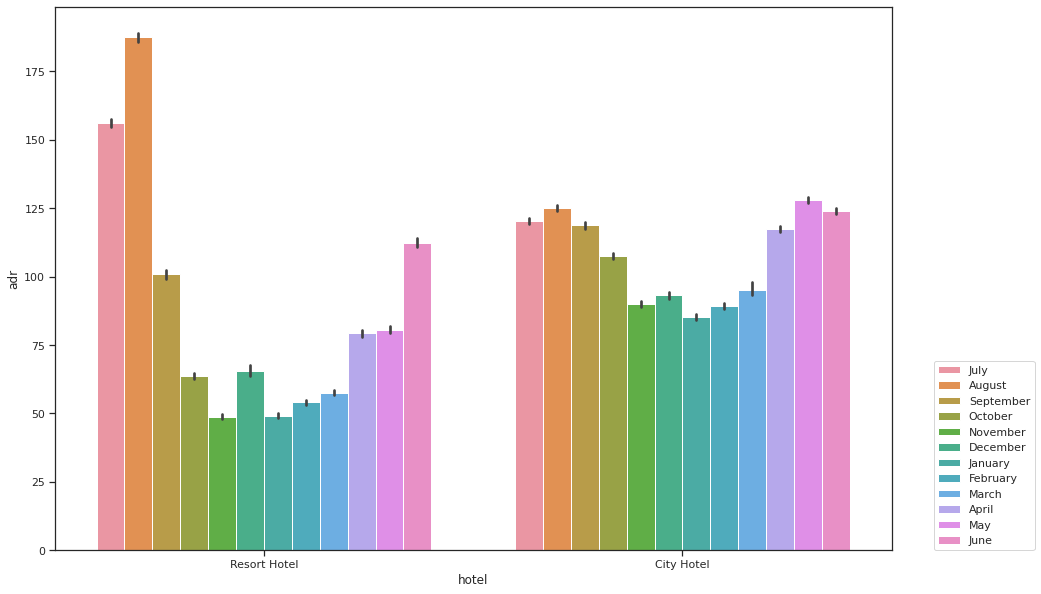

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = df, x = 'hotel', y = 'adr', hue ='arrival_date_month')
plt.legend(loc=(1.05, 0))

**Conclusions:**





1. The months of November, December, January and February would be the best time to book a hotel room in city hotels.
2. The months of  November,January would be the best time to book a hotel room in Resort hotels.

## What is the Optimal length of stay to get the best daily Rate?

Text(0, 0.5, 'Average Daily Rate')

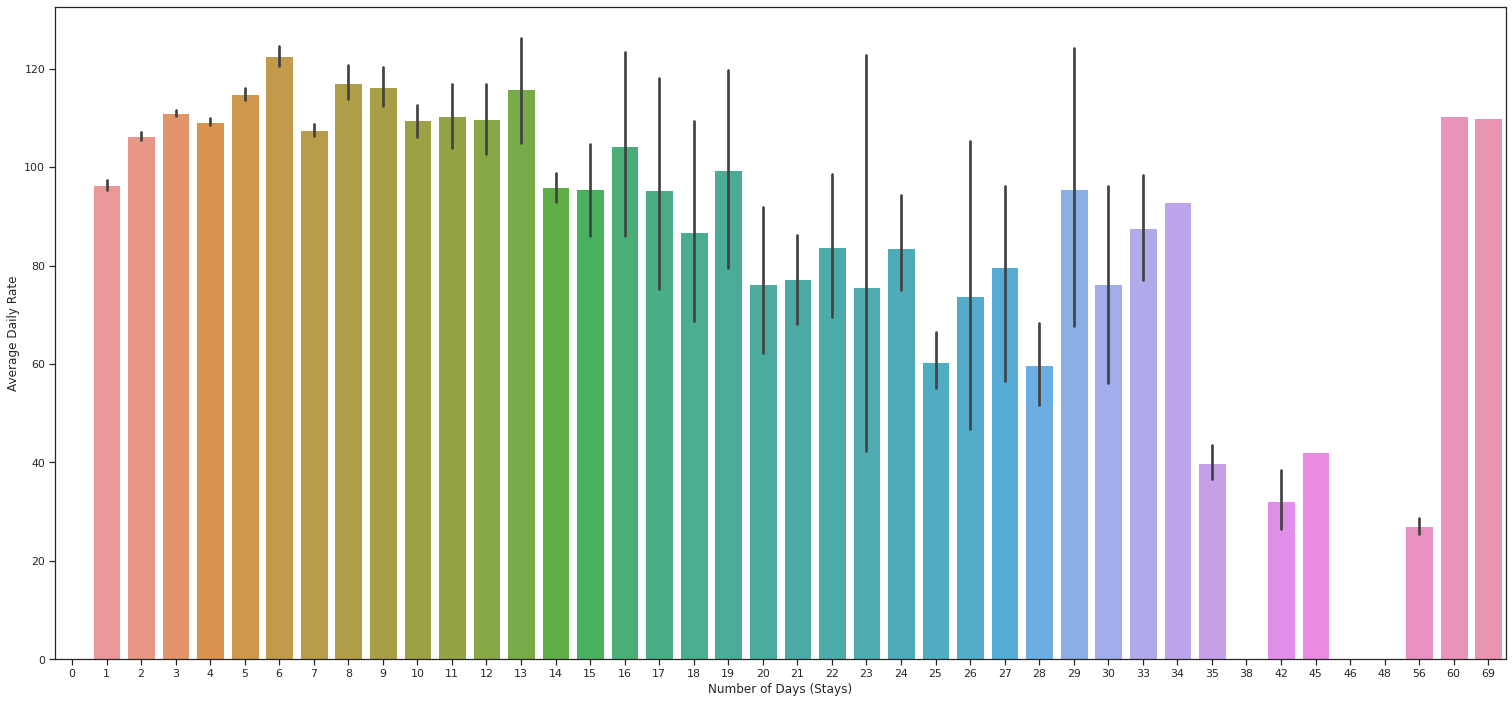

In [ ]:
plt.figure(figsize=(26,12))
sns.barplot(x = df['stays'], y = df['adr'])
plt.xlabel("Number of Days (Stays)")
plt.ylabel("Average Daily Rate")

**Conclusion :**
To get the best daily rate, A 25 days of stay seems optimal.

## Special requests

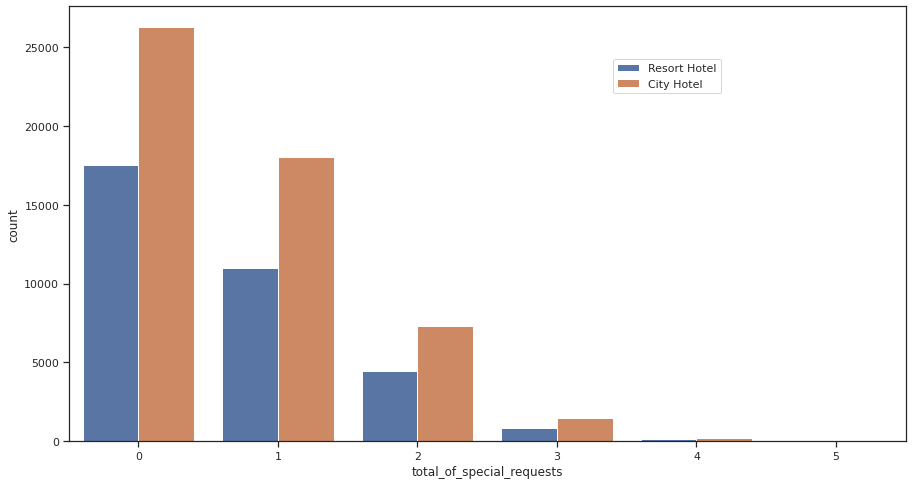

In [ ]:
#COUNT SPECIAL REQUESTS OVER THE YEARS
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = 'total_of_special_requests', hue = 'hotel')
plt.legend(loc=(.65,.8))

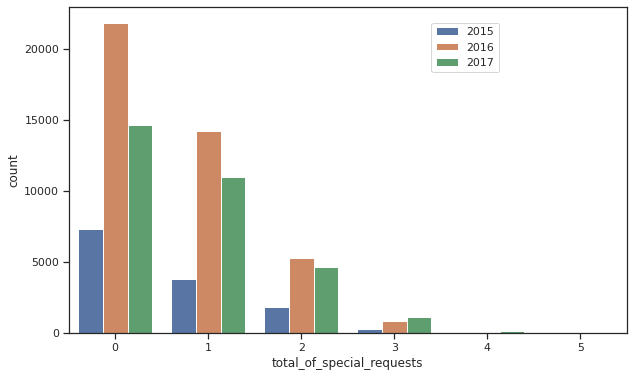

In [ ]:
#COUNT SPECIAL REQUESTS OVER THE YEARS
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'total_of_special_requests', hue = 'arrival_date_year')
plt.legend(loc=(.65,.8))

**Conclusion :**

There were more number of special requests in the year 2016, and In general, City hotels get more number of special requests than compared to Resort hotels.